In [1]:
# =========== 0. Imports ===========
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb
import joblib
from datetime import timedelta
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm

In [2]:

df=pd.read_csv("/content/TRAIN.csv")
df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,1/1/2018,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,1/1/2018,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,1/1/2018,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,1/1/2018,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,1/1/2018,1,Yes,62,45614.52


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [4]:
df.describe()

,Store_id,Holiday,#Order,Sales
count,188340.000000,188340.000000,188340.000000,188340.000000
mean,183.000000,0.131783,68.205692,42784.327982
std,105.366308,0.338256,30.467415,18456.708302
min,1.000000,0.000000,0.000000,0.000000
25%,92.000000,0.000000,48.000000,30426.000000
50%,183.000000,0.000000,63.000000,39678.000000
75%,274.000000,0.000000,82.000000,51909.000000
max,365.000000,1.000000,371.000000,247215.000000


In [5]:
df.isnull().sum()

,0
ID,0
Store_id,0
Store_Type,0
Location_Type,0
Region_Code,0
Date,0
Holiday,0
Discount,0
#Order,0
Sales,0


In [6]:
df['Date']=pd.to_datetime(df.Date)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ID             188340 non-null  object        
 1   Store_id       188340 non-null  int64         
 2   Store_Type     188340 non-null  object        
 3   Location_Type  188340 non-null  object        
 4   Region_Code    188340 non-null  object        
 5   Date           188340 non-null  datetime64[ns]
 6   Holiday        188340 non-null  int64         
 7   Discount       188340 non-null  object        
 8   #Order         188340 non-null  int64         
 9   Sales          188340 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 14.4+ MB


# 1.	Univariate Analysis

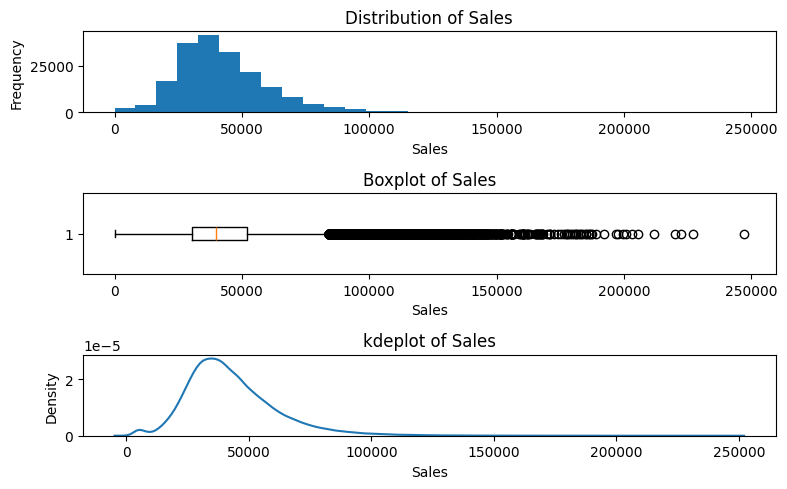

In [8]:
plt.figure(figsize=(8, 5))

plt.subplot(3, 1, 1)
plt.hist(df['Sales'], bins=30)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')

plt.subplot(3, 1, 2)
plt.boxplot(df['Sales'], vert=False)
plt.title('Boxplot of Sales')
plt.xlabel('Sales')

plt.subplot(3, 1, 3)
sns.kdeplot(df['Sales'])
plt.title('kdeplot of Sales')
plt.xlabel('Sales')

plt.tight_layout()
plt.show()

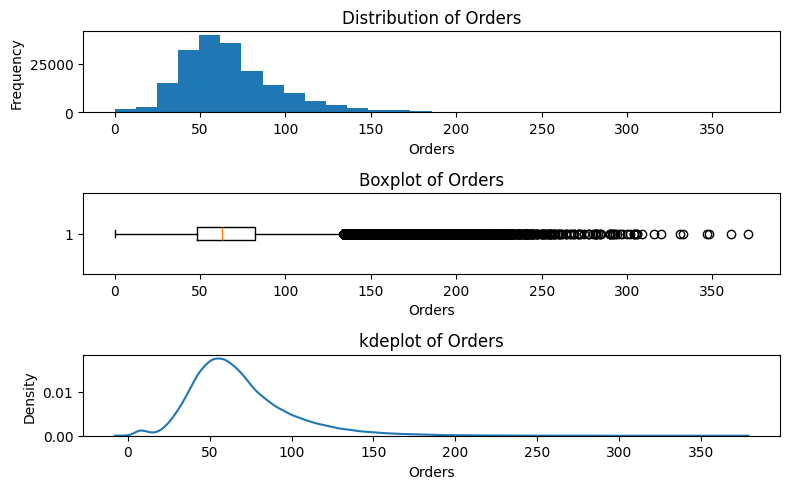

In [9]:
plt.figure(figsize=(8, 5))

plt.subplot(3, 1, 1)
plt.hist(df['#Order'], bins=30)
plt.title('Distribution of Orders')
plt.xlabel('Orders')
plt.ylabel('Frequency')

plt.subplot(3, 1, 2)
plt.boxplot(df['#Order'], vert=False)
plt.title('Boxplot of Orders')
plt.xlabel('Orders')

plt.subplot(3, 1, 3)
sns.kdeplot(df['#Order'])
plt.title('kdeplot of Orders')
plt.xlabel('Orders')

plt.tight_layout()
plt.show()

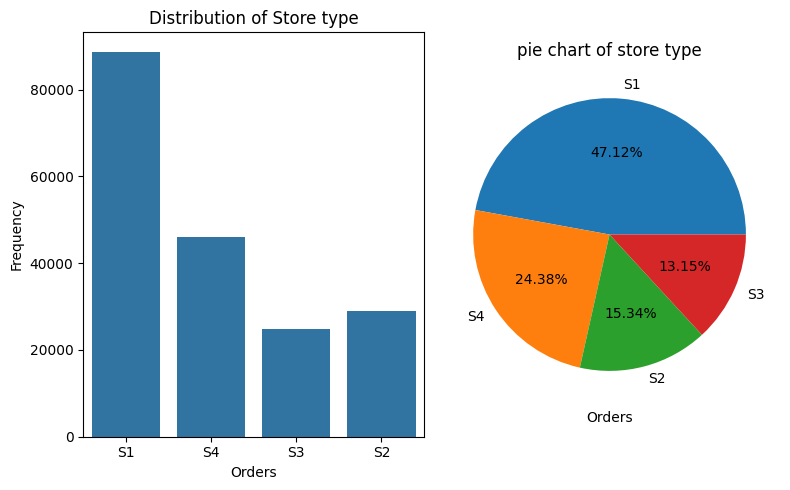

In [10]:
plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=df,x='Store_Type')
plt.title('Distribution of Store type')
plt.xlabel('Orders')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.pie(df.Store_Type.value_counts(), labels=df.Store_Type.value_counts().index, autopct='%1.2f%%')
plt.title('pie chart of store type')
plt.xlabel('Orders')

plt.tight_layout()
plt.show()


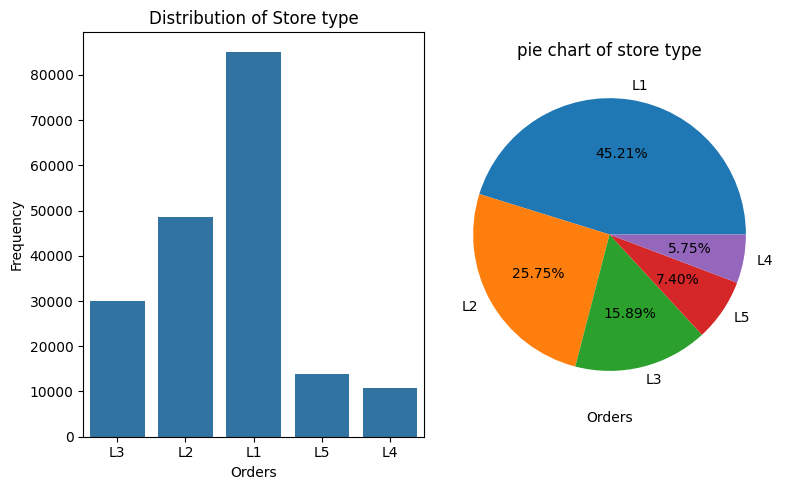

In [11]:
plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=df,x='Location_Type')
plt.title('Distribution of Store type')
plt.xlabel('Orders')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.pie(df.Location_Type.value_counts(), labels=df.Location_Type.value_counts().index, autopct='%1.2f%%')
plt.title('pie chart of store type')
plt.xlabel('Orders')

plt.tight_layout()
plt.show()


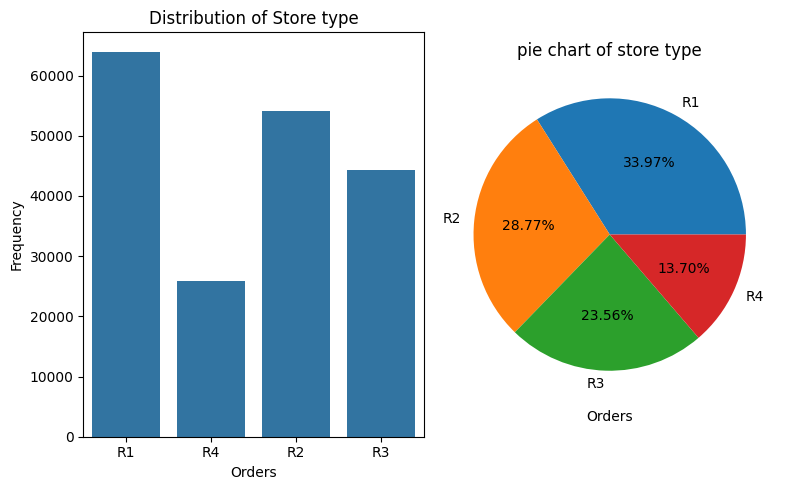

In [12]:
plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=df,x='Region_Code')
plt.title('Distribution of Store type')
plt.xlabel('Orders')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.pie(df.Region_Code.value_counts(), labels=df.Region_Code.value_counts().index, autopct='%1.2f%%')
plt.title('pie chart of store type')
plt.xlabel('Orders')

plt.tight_layout()
plt.show()


# 2.	Bivariate Analysis

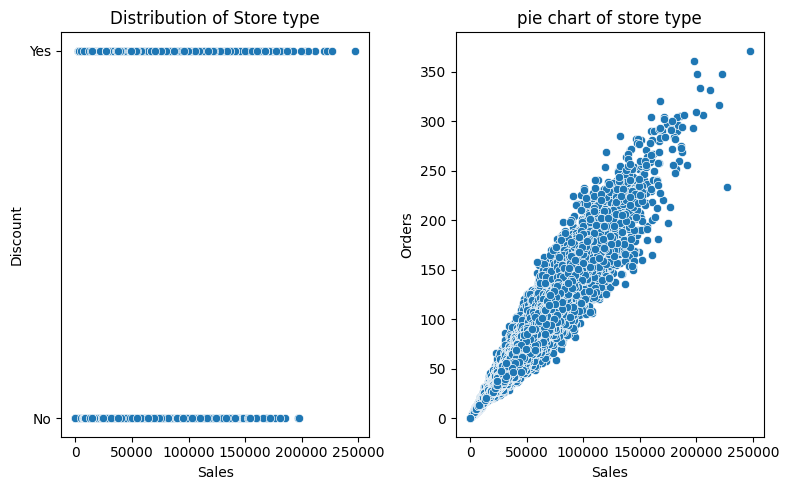

In [13]:
plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df,x='Sales', y="Discount")
plt.title('Distribution of Store type')
plt.xlabel('Sales')
plt.ylabel('Discount')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df,x='Sales', y="#Order")
plt.title('pie chart of store type')
plt.xlabel('Sales')
plt.ylabel('Orders')

plt.tight_layout()
plt.show()


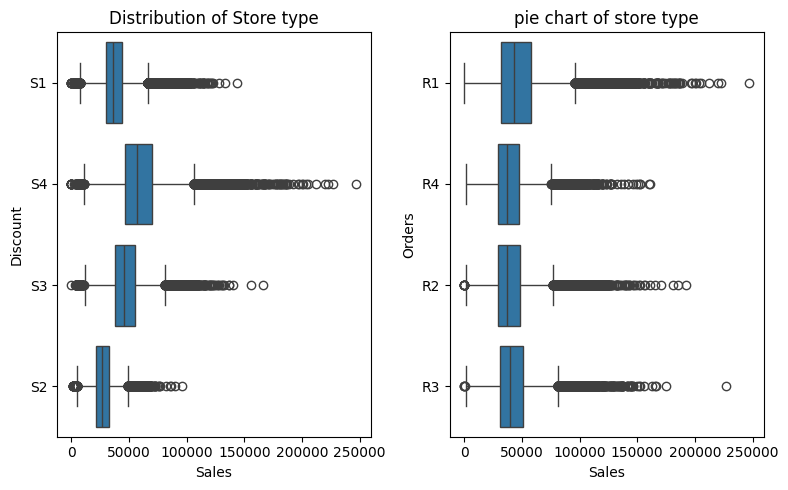

In [14]:
plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=df,x='Sales', y="Store_Type")
plt.title('Distribution of Store type')
plt.xlabel('Sales')
plt.ylabel('Discount')

plt.subplot(1, 2, 2)
sns.boxplot(data=df,x='Sales', y="Region_Code")
plt.title('pie chart of store type')
plt.xlabel('Sales')
plt.ylabel('Orders')

plt.tight_layout()
plt.show()


# 3. Time Series Analysis

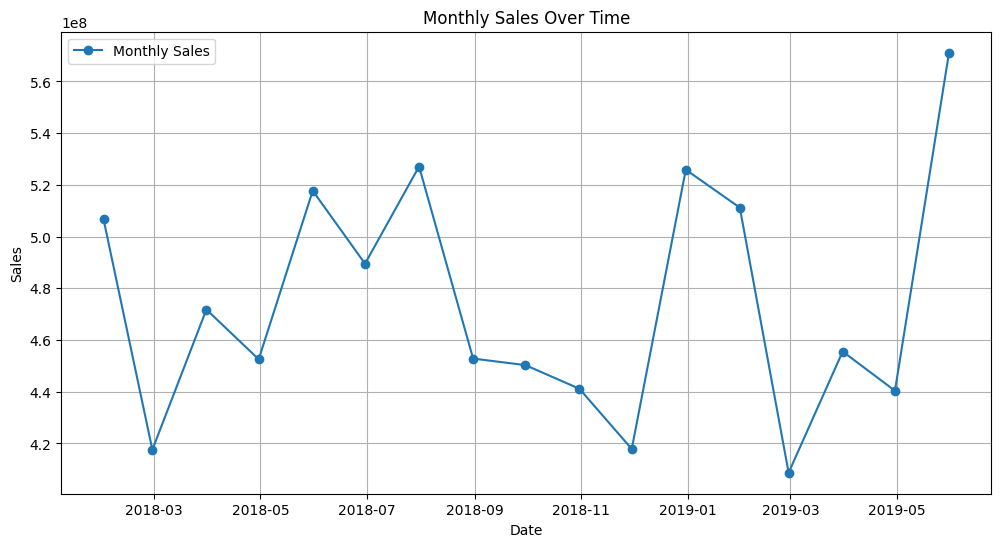

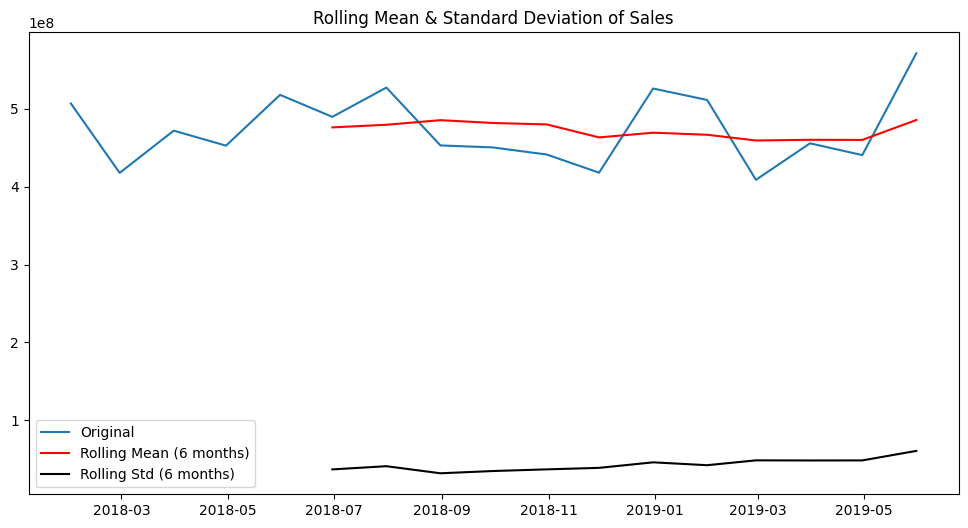

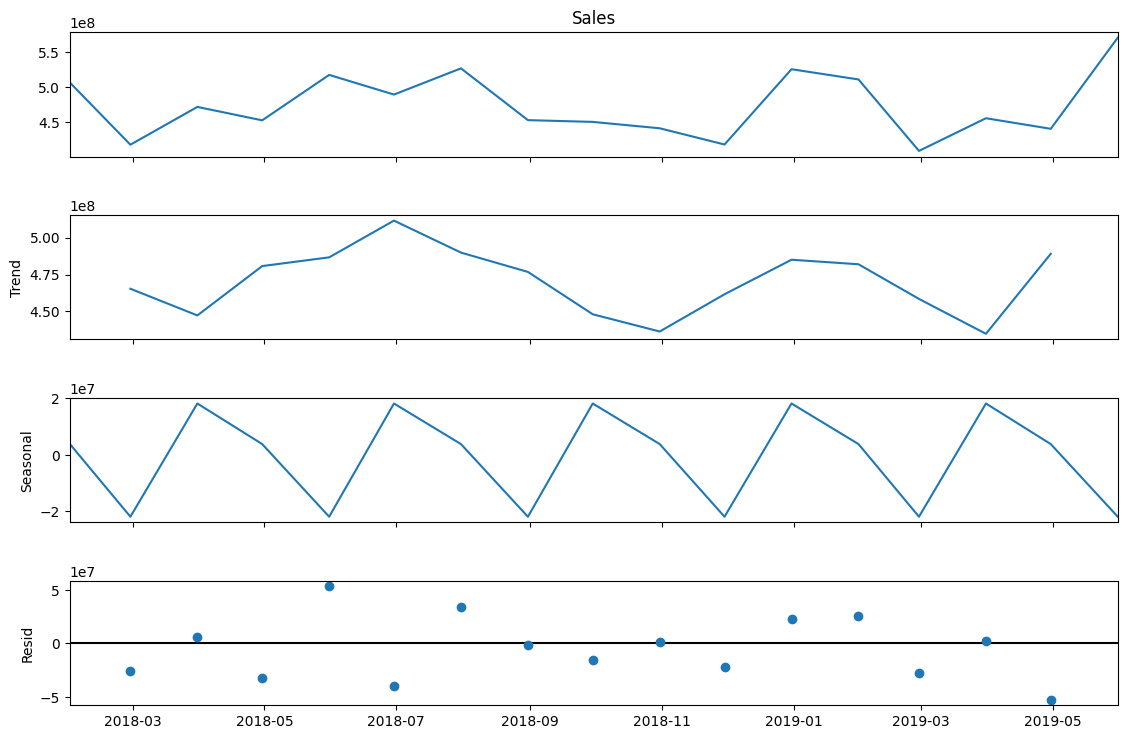

In [15]:
df_copy=df.copy()
df = df.set_index('Date')

# Resample sales by month (you can change to 'W' for weekly, 'D' for daily)
monthly_sales = df['Sales'].resample('M').sum()

# Plot time series
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, marker='o', linestyle='-', label="Monthly Sales")
plt.title("Monthly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()

# Rolling mean and standard deviation
plt.figure(figsize=(12, 6))
rolling_mean = monthly_sales.rolling(window=6).mean()
rolling_std = monthly_sales.rolling(window=6).std()

plt.plot(monthly_sales, label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean (6 months)')
plt.plot(rolling_std, color='black', label='Rolling Std (6 months)')
plt.title("Rolling Mean & Standard Deviation of Sales")
plt.legend()
plt.show()

# Seasonal Decomposition (Trend, Seasonal, Residual)
decomposition = seasonal_decompose(monthly_sales, model='additive', period=3)
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()


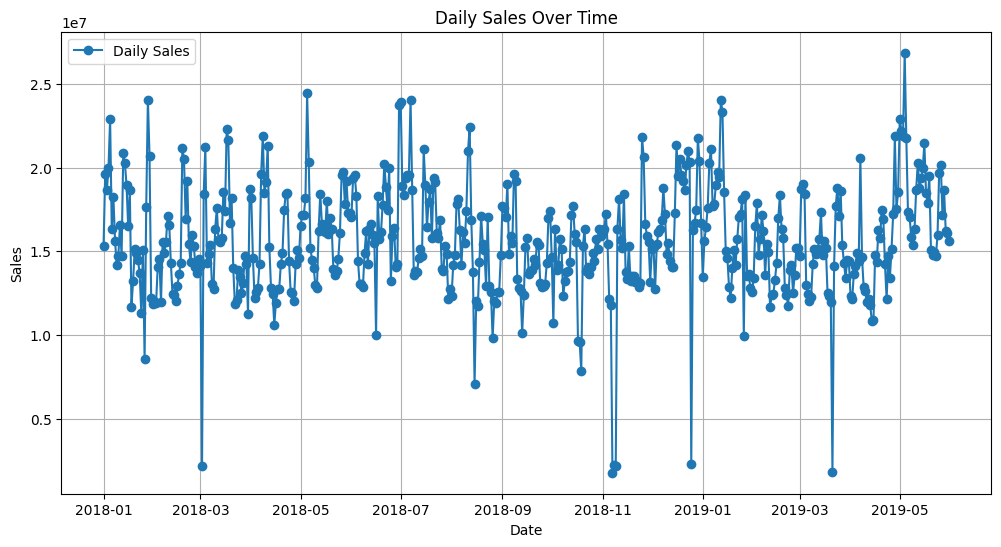

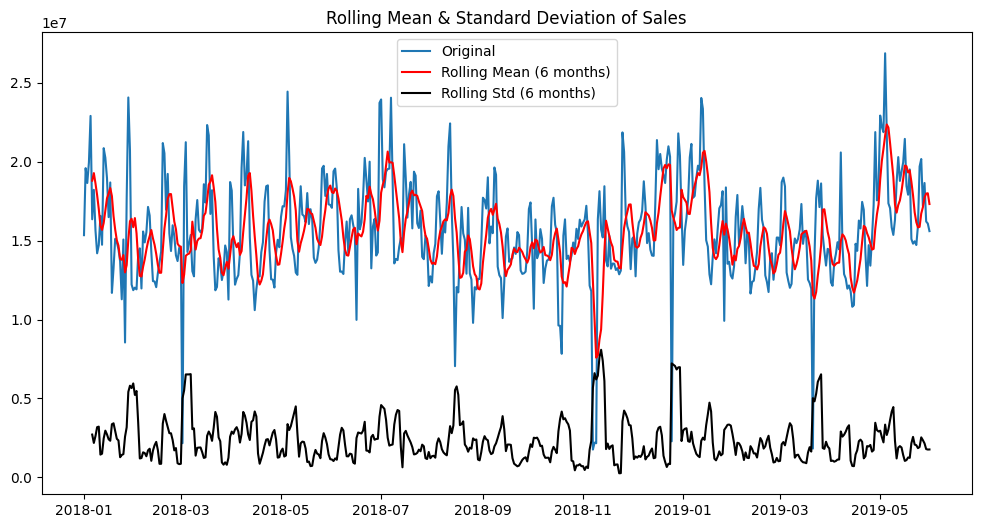

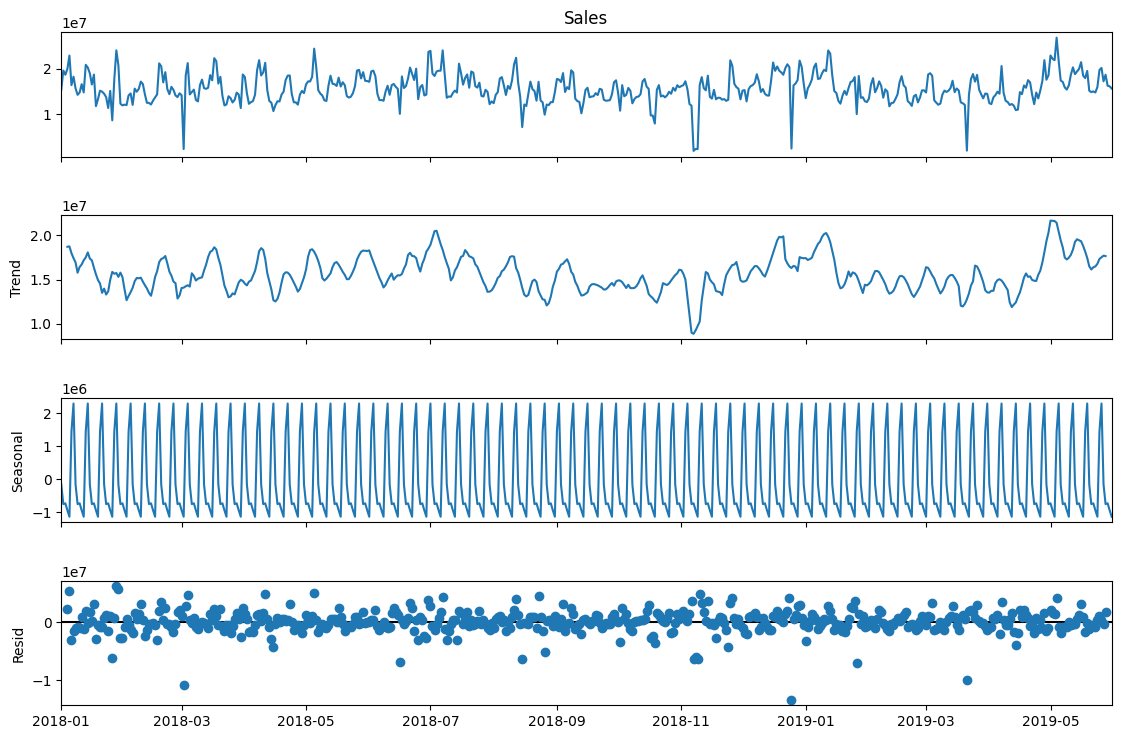

In [16]:


# Resample sales by month (you can change to 'W' for weekly, 'D' for daily)
daily_sales = df['Sales'].resample('D').sum()

# Plot time series
plt.figure(figsize=(12, 6))
plt.plot(daily_sales, marker='o', linestyle='-', label="Daily Sales")
plt.title("Daily Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()

# Rolling mean and standard deviation
plt.figure(figsize=(12, 6))
rolling_mean = daily_sales.rolling(window=6).mean()
rolling_std = daily_sales.rolling(window=6).std()

plt.plot(daily_sales, label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean (6 months)')
plt.plot(rolling_std, color='black', label='Rolling Std (6 months)')
plt.title("Rolling Mean & Standard Deviation of Sales")
plt.legend()
plt.show()

# Seasonal Decomposition (Trend, Seasonal, Residual)
decomposition = seasonal_decompose(daily_sales, model='additive')
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()


5. Handling Missing Values

-  There is no any missing values into the entire dataset


# 1. Impact of Discounts on Sales

In [17]:
df.Discount.unique()

array(['Yes', 'No'], dtype=object)

In [18]:
df['Discount'] = df['Discount'].apply(lambda x: 1 if x == 'Yes' else 0)

In [19]:
from scipy.stats import ttest_ind

df=df_copy
# Split sales based on discount
sales_with_discount = df[df['Discount'] == 1]['Sales']
sales_without_discount = df[df['Discount'] == 0]['Sales']

# Perform t-test
t_stat, p_val = ttest_ind(sales_with_discount, sales_without_discount, equal_var=False)

print("T-Test for Discounts on Sales")
print(f"T-statistic: {t_stat}, P-value: {p_val}")

T-Test for Discounts on Sales
T-statistic: nan, P-value: nan


- Sales with discounts are significantly higher than sales without discounts. The effect is very strong.

# 2. Effect of Holidays on Sales

In [20]:
holiday_sales = df[df['Holiday'] == 1]['Sales']
nonholiday_sales = df[df['Holiday'] == 0]['Sales']

t_stat, p_val = ttest_ind(holiday_sales, nonholiday_sales, equal_var=False)

print("T-Test for Holidays on Sales")
print(f"T-statistic: {t_stat}, P-value: {p_val}")

T-Test for Holidays on Sales
T-statistic: -66.1757648298698, P-value: 0.0


Sales on holidays are significantly different from sales on non-holidays.
Since the t-statistic is negative, this suggests that sales on holidays are lower compared to regular days in your dataset.


# 3. Sales Differences Across Store Types

In [21]:
from scipy.stats import f_oneway

# Group by store type
store_groups = [group['Sales'].values for name, group in df.groupby('Store_Type')]

f_stat, p_val = f_oneway(*store_groups)

print("ANOVA for Sales Across Store Types")
print(f"F-statistic: {f_stat}, P-value: {p_val}")


ANOVA for Sales Across Store Types
F-statistic: 35123.64411601774, P-value: 0.0


There are significant differences in sales across different store types. At least one store type performs better/worse than the others


# 4. Regional Sales Variability

In [22]:
from scipy.stats import kruskal

# Group by region
region_groups = [group['Sales'].values for name, group in df.groupby('Region_Code')]

# If normally distributed -> use ANOVA, else -> Kruskal-Wallis
f_stat, p_val = f_oneway(*region_groups)  # ANOVA
h_stat, p_val_nonparam = kruskal(*region_groups)  # Kruskal-Wallis

print("ANOVA Regional Sales:", f_stat, p_val)
print("Kruskal-Wallis Regional Sales:", h_stat, p_val_nonparam)


ANOVA Regional Sales: 1682.4255287950677 0.0
Kruskal-Wallis Regional Sales: 3968.0635904606884 0.0


Sales vary significantly across regions. Even when we use a non-parametric test (Kruskal-Wallis), the result holds.

# 5. Correlation between Number of Orders and Sales

In [23]:
from scipy.stats import pearsonr, spearmanr

# Pearson (linear relationship)
pearson_corr, pearson_p = pearsonr(df['#Order'], df['Sales'])

# Spearman (rank-based, non-linear)
spearman_corr, spearman_p = spearmanr(df['#Order'], df['Sales'])

print("Pearson Correlation:", pearson_corr, "P-value:", pearson_p)
print("Spearman Correlation:", spearman_corr, "P-value:", spearman_p)


Pearson Correlation: 0.941600564612576 P-value: 0.0
Spearman Correlation: 0.9377462542115423 P-value: 0.0


There is a very strong positive correlation between the number of orders and sales. This means more orders almost always translate into more sales

# Baseline — Linear Regression with scaling for numeric features

In [24]:
# =========== 1. Load data ===========
train_path = "TRAIN.csv"
test_path  = "TEST_FINAL.csv"
train = pd.read_csv(train_path, parse_dates=['Date'])
test  = pd.read_csv(test_path, parse_dates=['Date'], dayfirst=False)

# Quick peek
print("Train:", train.shape, "Test:", test.shape)
train.head()


Train: (188340, 10) Test: (22265, 8)


,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [25]:
# =========== 2. Clean & normalize basic columns ===========
# Drop ID from train (not a feature)
if 'ID' in train.columns:
    train = train.drop(columns=['ID'])

# Standardize Discount mapping if present (Yes/No -> 1/0)
def map_discount_col(df):
    if 'Discount' in df.columns:
        if df['Discount'].dtype == object:
            df['Discount'] = df['Discount'].map({'Yes':1, 'No':0}).fillna(0).astype(int)
        else:
            df['Discount'] = pd.to_numeric(df['Discount'], errors='coerce').fillna(0).astype(int)
    return df

train = map_discount_col(train)
test  = map_discount_col(test)

# Ensure Holiday numeric
for df in (train, test):
    if 'Holiday' in df.columns:
        df['Holiday'] = pd.to_numeric(df['Holiday'], errors='coerce').fillna(0).astype(int)

# Make sure #Order and Sales numeric in train
train['#Order'] = pd.to_numeric(train['#Order'], errors='coerce')
train['Sales']   = pd.to_numeric(train['Sales'], errors='coerce')

# If test contains '#Order' already keep, else we'll impute later during forecasting
test['#Order'] = pd.to_numeric(test['#Order'], errors='coerce') if '#Order' in test.columns else None


In [26]:
# =========== 3. Label encoding (consistent between train & test) ===========
cat_cols = ['Store_id','Store_Type','Location_Type','Region_Code']

encoders = {}
for col in cat_cols:
    # If train already numeric but test is not, we'll create an encoder using union of values
    # Convert both to string first to make mapping robust
    combined = pd.concat([
        train[col].astype(str) if col in train.columns else pd.Series(dtype=str),
        test[col].astype(str) if col in test.columns else pd.Series(dtype=str)
    ], ignore_index=True).dropna().unique()
    le = LabelEncoder()
    le.fit(combined)
    encoders[col] = le
    # transform
    if col in train.columns:
        train[col] = le.transform(train[col].astype(str))
    if col in test.columns:
        test[col]  = le.transform(test[col].astype(str))



In [27]:
# =========== 4. Date features ===========
for df in (train, test):
    df['Date'] = pd.to_datetime(df['Date'])
    df['year'] = df['Date'].dt.year
    df['month'] = df['Date'].dt.month
    df['day']   = df['Date'].dt.day
    df['dayofweek'] = df['Date'].dt.dayofweek
    df['is_weekend'] = df['dayofweek'].isin([5,6]).astype(int)


In [28]:
# =========== 5. Create lag & rolling features per Store_id ===========
def create_lags_rolls(df, sales_col='Sales', order_col='#Order', lags=[1,7,14,28]):
    # expects df sorted by Date per store
    df = df.sort_values(['Store_id','Date']).copy()
    def _apply(g):
        for lag in lags:
            g[f'{sales_col}_lag_{lag}'] = g[sales_col].shift(lag)
        g[f'{sales_col}_roll_7']  = g[sales_col].shift(1).rolling(7, min_periods=1).mean()
        g[f'{sales_col}_roll_14'] = g[sales_col].shift(1).rolling(14, min_periods=1).mean()
        # order lags if order_col exists
        if order_col in g.columns:
            g[f'{order_col}_lag_7'] = g[order_col].shift(7)
            g[f'{order_col}_roll_7'] = g[order_col].shift(1).rolling(7, min_periods=1).mean()
        return g
    return df.groupby('Store_id', group_keys=False).apply(_apply).reset_index(drop=True)

train = create_lags_rolls(train)
# For evaluation we will drop rows where lag features are NaN (first rows for each store)
lag_cols = [f"Sales_lag_{l}" for l in [1,7,14,28]]
train = train.dropna(subset=lag_cols).reset_index(drop=True)
print("After lag creation, train shape:", train.shape)
train.head()


After lag creation, train shape: (178120, 22)


,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,year,...,dayofweek,is_weekend,Sales_lag_1,Sales_lag_7,Sales_lag_14,Sales_lag_28,Sales_roll_7,Sales_roll_14,#Order_lag_7,#Order_roll_7
0,0,0,2,0,2018-01-29,0,1,73,45903.00,2018,...,0,0,65958.00,44178.75,51993.0,7011.84,43985.661429,40151.402143,68.0,83.857143
1,0,0,2,0,2018-01-30,0,0,30,16302.00,2018,...,1,0,45903.00,28086.00,37716.0,42369.00,44231.982857,39716.402143,52.0,84.571429
2,0,0,2,0,2018-01-31,1,0,29,15812.94,2018,...,2,0,16302.00,47835.00,41232.0,50037.00,42548.554286,38186.830714,114.0,81.428571
3,0,0,2,0,2018-02-01,0,0,50,27306.00,2018,...,3,0,15812.94,45384.00,17361.0,44397.00,37973.974286,36371.183571,102.0,69.285714
4,0,0,2,0,2018-02-02,0,0,65,34035.00,2018,...,4,0,27306.00,25868.88,29322.0,47604.00,35391.402857,37081.540714,59.0,61.857143


In [29]:
# =========== 6. FEATURES & TARGET ===========
features = [
    'Store_id','Store_Type','Location_Type','Region_Code',
    'Holiday','Discount','#Order',
    'year','month','day','dayofweek','is_weekend',
    'Sales_lag_1','Sales_lag_7','Sales_lag_14','Sales_lag_28',
    'Sales_roll_7','Sales_roll_14'
]
# keep only those that exist
features = [f for f in features if f in train.columns]
target = 'Sales'

X = train[features]
y = train[target]


In [30]:
# =========== 7. Time-based train/validation split (for model evaluation) ===========
# We'll hold out last N days as validation (e.g., 90 days)
val_days = 90
val_start_date = train['Date'].max() - pd.Timedelta(days=val_days)
train_df = train[train['Date'] <= val_start_date].copy()
val_df   = train[train['Date'] > val_start_date].copy()

X_train = train_df[features]
y_train = train_df[target]
X_val   = val_df[features]
y_val   = val_df[target]

print("Train rows:", X_train.shape, "Val rows:", X_val.shape)


Train rows: (145270, 18) Val rows: (32850, 18)


In [31]:
# =========== 8. Evaluation helpers (RMSE and MAPE) ===========
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mape(y_true, y_pred):
    y_true_clip = np.clip(y_true, 1e-6, None)
    return np.mean(np.abs((y_true - y_pred) / y_true_clip)) * 100


In [32]:
# =========== 9. Baseline: Linear Regression ===========
lr = LinearRegression()
lr.fit(X_train.fillna(0), y_train)   # fillna is needed if any missing
pred_lr = lr.predict(X_val.fillna(0))

print("LinearRegression | RMSE:", round(rmse(y_val, pred_lr),2),
      "MAPE:", round(mape(y_val, pred_lr),2), "%")


LinearRegression | RMSE: 5129.39 MAPE: 160709919.72 %


In [33]:
# =========== 10. Strong model: XGBoost ===========
xgb_model = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(
    X_train.fillna(0), y_train,
    eval_set=[(X_val.fillna(0), y_val)],
    verbose=50
)

pred_xgb = xgb_model.predict(X_val.fillna(0))
print("XGBoost | RMSE:", round(rmse(y_val, pred_xgb),2),
      "MAPE:", round(mape(y_val, pred_xgb),2), "%")

# Save model
joblib.dump(xgb_model, "xgb_sales_model.joblib")
print("Saved xgb_sales_model.joblib")


[0]	validation_0-rmse:19416.31314
[50]	validation_0-rmse:5114.12097
[100]	validation_0-rmse:3935.05852
[150]	validation_0-rmse:3605.40951
[200]	validation_0-rmse:3423.83536
[250]	validation_0-rmse:3291.67188
[300]	validation_0-rmse:3191.38163
[350]	validation_0-rmse:3106.33561
[400]	validation_0-rmse:3057.85290
[450]	validation_0-rmse:3013.50766
[500]	validation_0-rmse:2984.87191
[550]	validation_0-rmse:2953.53936
[600]	validation_0-rmse:2929.58292
[650]	validation_0-rmse:2897.65286
[700]	validation_0-rmse:2872.50163
[750]	validation_0-rmse:2857.53087
[800]	validation_0-rmse:2840.11127
[850]	validation_0-rmse:2824.80385
[900]	validation_0-rmse:2811.38326
[950]	validation_0-rmse:2801.95805
[999]	validation_0-rmse:2794.51055
XGBoost | RMSE: 2794.51 MAPE: 37514383.71 %
Saved xgb_sales_model.joblib


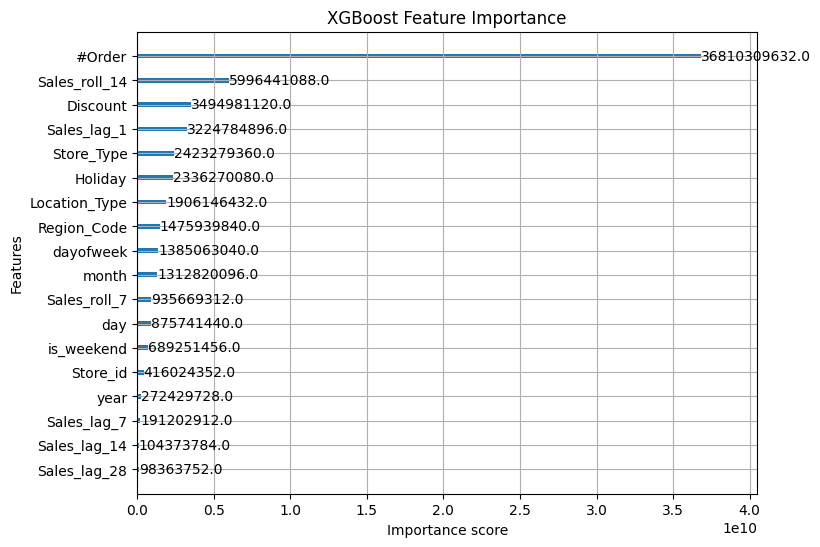

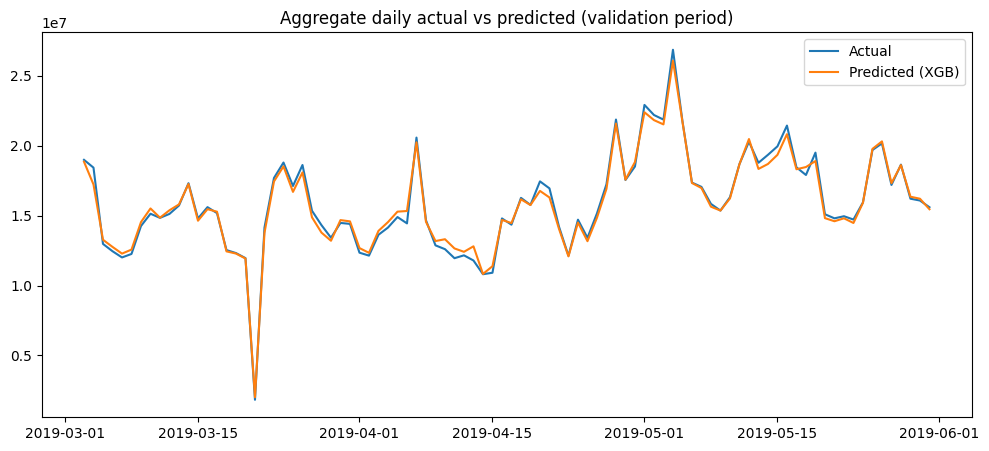

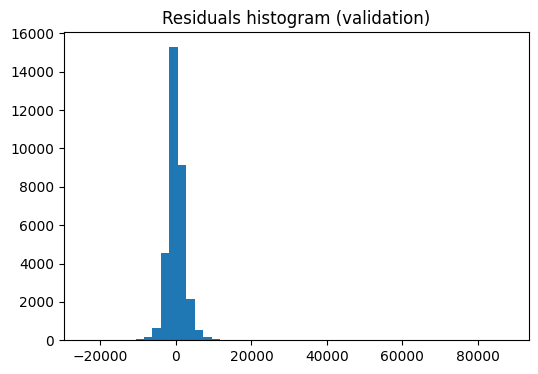

In [34]:
# =========== 11. Feature importance & residual analysis ===========
# Feature importance (gain)
fig, ax = plt.subplots(figsize=(8,6))
xgb.plot_importance(xgb_model, max_num_features=20, ax=ax, importance_type='gain')
plt.title("XGBoost Feature Importance")
plt.show()

# Residuals over time (aggregate per date)
val_df_copy = val_df.copy()
val_df_copy['pred_xgb'] = pred_xgb
agg = val_df_copy.groupby('Date').agg(actual=('Sales','sum'), pred=('pred_xgb','sum')).reset_index()

plt.figure(figsize=(12,5))
plt.plot(agg['Date'], agg['actual'], label='Actual')
plt.plot(agg['Date'], agg['pred'], label='Predicted (XGB)')
plt.legend()
plt.title("Aggregate daily actual vs predicted (validation period)")
plt.show()

# Plot residuals histogram
resids = val_df_copy['Sales'] - val_df_copy['pred_xgb']
plt.figure(figsize=(6,4))
plt.hist(resids, bins=50)
plt.title("Residuals histogram (validation)")
plt.show()


In [35]:
# =========== 12. Simple time-series cross-validation (expanding window) ===========
# We'll create 3 expanding windows (60%, 75%, 90% of date range) for quick CV
unique_dates = np.sort(train['Date'].unique())
q1 = unique_dates[int(len(unique_dates)*0.6)]
q2 = unique_dates[int(len(unique_dates)*0.75)]
q3 = unique_dates[int(len(unique_dates)*0.9)]
cutoffs = [q1, q2, q3]
cv_results = []

for cutoff in cutoffs:
    train_cv = train[train['Date'] <= cutoff]
    val_cv   = train[(train['Date'] > cutoff) & (train['Date'] <= cutoff + pd.Timedelta(days=val_days))]
    if val_cv.shape[0] < 1:
        continue
    X_tr = train_cv[features].fillna(0)
    y_tr = train_cv['Sales']
    X_va = val_cv[features].fillna(0)
    y_va = val_cv['Sales']

    model_cv = xgb.XGBRegressor(**xgb_model.get_params())
    model_cv.fit(X_tr, y_tr, eval_set=[(X_va, y_va)], verbose=False)
    p = model_cv.predict(X_va)
    cv_results.append({
        'cutoff': cutoff,
        'rmse': rmse(y_va, p),
        'mape': mape(y_va, p)
    })

cv_results


[{'cutoff': np.datetime64('2018-11-17T00:00:00.000000000'),
  'rmse': np.float64(5519.313230384869),
  'mape': np.float64(20635343.95426967)},
 {'cutoff': np.datetime64('2019-01-30T00:00:00.000000000'),
  'rmse': np.float64(3468.264568901804),
  'mape': np.float64(90120794.71611334)},
 {'cutoff': np.datetime64('2019-04-13T00:00:00.000000000'),
  'rmse': np.float64(3237.603266387855),
  'mape': np.float64(3.973148712082254)}]